# Introducrtion to Machine Learning: Assignment #4
## Submission date: 31\07\2024, 23:55.
### Topics:
- Ensemble methods
- AdaBoost
- PCA
- LDA
- K means clustering

Submitted by:

 **Student 1 Obaida Khateeb+201278066

 **Student 2 Adham Dahli+318575834

**Assignment Instruction:**

· Submissions in pairs only.

· Try to keep the code as clean, concise, and short as possible

· If you wish to work in your IDE, you can, but you **must**,  insert the script back to the matching cells of the notebook and run the code. <br/>Only the notebook will be submitted in moodle (in `.ipynb` format).

· <font color='red'>Please write your answers to question in red</font>.

**Important:** All plots, results and outputs should be included in the notebook as the cells' outputs (run all cells and do not clear the output). <br/>

**Important:** Your submission must be entirely your own. Any attempts of plagiarism (including ChatGPT) will lead to grade 0 and disciplinary actions.


## Question 1 - Bagging
In HW3, you helped Charles Darvin with regression of abalone problem and now, you will try combining multiple regression models instead of just one, hopefully for a better result.

In [195]:
# import libraries

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

In [196]:
# load the data, transform it

df = pd.read_csv('https://sharon.srworkspace.com/ml/datasets/hw3/abalone.csv', header=None)
data = df.to_numpy()

train, test = train_test_split(data, test_size=0.2, random_state=21)

X_train, y_train = train[:,:-1], train[:, -1]
X_test, y_test = test[:,:-1], test[:, -1]

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Your task is to complete the following bagging model. Specifically:
- fit(self, data, targets) - train n_estimators regressors, each with data in size n=len(data) that is drawn from the original data, with repititions.
- predict(self, test) - predict the result for all the regressors as learned.



In [197]:
from sklearn.linear_model import LinearRegression

class LinRegCombiner():
    def __init__(self, n_estimators):
        self.n_estimators = n_estimators

    def fit(self, data, targets):
        self.regressors = []

        for _ in range(self.n_estimators):
            # Implement here
            dataset = np.random.choice(data.shape[0], data.shape[0], replace = True) #creating an array of indexes of the dataset selected, it's composed of len(data) samples with option of repetition
            dataset_X = data[dataset] #extracting the samples of the dataset samples selected
            dataset_y = targets[dataset] #extracting the targets of the dataset samples selected

            #training the model
            regressor = LinearRegression()
            regressor.fit(dataset_X, dataset_y)

            #adding the model to the list of models
            self.regressors.append(regressor)

    def predict(self, test):
        preds = []
        # Implement here
        for regressor in self.regressors:
            predictions = regressor.predict(test)
            preds.append(predictions)
        return np.mean(preds, axis=0) #returning the mean of all preds

    def score(self, test, targets):
        temp = self.predict(test)
        return np.mean((targets - temp) ** 2)

In [198]:
# Run for 100 estimators

obj = LinRegCombiner(n_estimators=100)
obj.fit(X_train, y_train)

mse = obj.score(X_train, y_train)
print(f'MSE train = {mse}')

mse = obj.score(X_test, y_test)
print(f'MSE test = {mse}')

MSE train = 4.807611890509439
MSE test = 5.3756964604295545


Now, implement the same but using ridge regression

In [199]:
from sklearn.linear_model import Ridge
from sklearn.base import BaseEstimator, RegressorMixin

class RidgeLinRegCombiner(BaseEstimator, RegressorMixin):
    def __init__(self, n_estimators, alpha=1.0):
        self.n_estimators = n_estimators
        self.alpha = alpha

    def fit(self, data, targets):
        self.regressors = []

        for _ in range(self.n_estimators):
            # Implement here
            dataset = np.random.choice(data.shape[0], data.shape[0], replace = True) #creating an array of indexes of the dataset selected, it's composed of len(data) samples with option of repetition
            dataset_X = data[dataset] #extracting the samples of the dataset samples selected
            dataset_y = targets[dataset] #extracting the targets of the dataset samples selected

            #training the model
            regressor = Ridge(alpha= self.alpha)
            regressor.fit(dataset_X, dataset_y)

            #adding the model to the list of models
            self.regressors.append(regressor)

    def predict(self, test):
        preds = []
        # Implement here
        for regressor in self.regressors:
            predictions = regressor.predict(test) #getting the predictions from the current regressor
            preds.append(predictions) #adding the predictions to preds
        return np.mean(preds, axis=0) #returning the mean of preds

    def score(self, test, targets):
        temp = self.predict(test)
        return np.mean((targets - temp) ** 2)

Tune the hyperparameters for RidgeLinRegCombiner.

In [200]:
# Implement here

#defining the range of values for the two hyperparameters
n_estimators_range = np.arange(3,100,1)
alpha_range = np.arange(0.01,10,0.01)

#initiallizing the 2 hyperparameters and the best_score
n = 0
alpha = 0
best_score = np.inf

for val in range(20):
  #selecting a random value for each of the hyperparameters out of the range of values previously defined
  current_n = np.random.choice(n_estimators_range)
  current_alpha = np.random.choice(alpha_range)

  model = RidgeLinRegCombiner(n_estimators=current_n, alpha=current_alpha) #creating an instance of RidgeLinRegCombiner with the current hyperparameters
  model.fit(X_train, y_train) #fitting the data to the model
  score = model.score(X_test, y_test) #computing the score on the test set

  #updating the best hyperparameters if needed
  if score < best_score:
    best_score = score
    n = current_n
    alpha = current_alpha
  print(f'n_estimators={current_n}, alpha={current_alpha} Average score({val}): {"{:.3f}".format(score)}')

n_estimators=74, alpha=6.1 Average score(0): 5.392
n_estimators=75, alpha=7.12 Average score(1): 5.394
n_estimators=42, alpha=1.05 Average score(2): 5.375
n_estimators=35, alpha=7.37 Average score(3): 5.408
n_estimators=4, alpha=7.99 Average score(4): 5.417
n_estimators=38, alpha=9.64 Average score(5): 5.414
n_estimators=68, alpha=9.79 Average score(6): 5.410
n_estimators=30, alpha=1.28 Average score(7): 5.391
n_estimators=17, alpha=2.55 Average score(8): 5.398
n_estimators=65, alpha=9.3 Average score(9): 5.407
n_estimators=58, alpha=2.86 Average score(10): 5.389
n_estimators=39, alpha=1.97 Average score(11): 5.376
n_estimators=74, alpha=7.1 Average score(12): 5.397
n_estimators=63, alpha=3.51 Average score(13): 5.387
n_estimators=27, alpha=9.01 Average score(14): 5.415
n_estimators=71, alpha=8.16 Average score(15): 5.398
n_estimators=37, alpha=1.23 Average score(16): 5.372
n_estimators=92, alpha=0.8200000000000001 Average score(17): 5.382
n_estimators=27, alpha=5.02 Average score(18):

Print both MSEs on train and test.
Which model is better for our problem? <br/>
<font color='red'>Write your answer here and explain it</br> The 'RidgeLinRegCombiner' model performed slightly better than 'LinRegCombiner' on unseen data. However, the differencess are tiny and not so consistent. Based on the MSE differences on the MSE's for both the training and data sets of samples between the two models, LinRegCombiner had higher score on training data, but lower in test data which indicates that it handled overfitting and generalized better on unseen data. </font>

In [201]:
# Run for n estimators and alpha you found

obj = RidgeLinRegCombiner(n_estimators=n, alpha=alpha)
obj.fit(X_train, y_train)

mse = obj.score(X_train, y_train)
print(f'MSE train = {mse}')

mse = obj.score(X_test, y_test)
print(f'MSE test = {mse}')

MSE train = 4.824937757562037
MSE test = 5.354196354812683


## Question 2 - Clustering

We learned in the tutorials about partitional clustering and specifically – k means algorithm. <br/>
In this question you will implement it and see some nice applications.

import libraries

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

Complete the missing implementation of Kmeans. Since there are k clusters, we will label each point with {0,..,k-1}.

In [125]:
class Kmeans:

	def __init__(self, n_clusters, max_iter=100, random_state=123):
		self.n_clusters = n_clusters
		self.max_iter = max_iter
		self.random_state = random_state

	def initialize_centroids(self, X):
		np.random.RandomState(self.random_state)
		random_idx = np.random.permutation(X.shape[0])
		centroids = X[random_idx[:self.n_clusters]]
		return centroids

	def reassign_centroids(self, X, labels):
		centroids = np.zeros((self.n_clusters, X.shape[1]))
		# Implement here
		for k in range(self.n_clusters):
			centroids[k] = np.mean(X[labels == k], axis=0)
		return centroids

	def compute_distance(self, X, centroids):
		distance = np.zeros((X.shape[0], self.n_clusters))
		for k in range(self.n_clusters):
			row_norm = np.linalg.norm(X - centroids[k, :], axis=1)
			distance[:, k] = np.square(row_norm)
		return distance

	def find_closest_cluster(self, distance):
		return np.argmin(distance, axis=1)

	def compute_sse(self, X, labels, centroids):
		distance = np.zeros(X.shape[0])
		for k in range(self.n_clusters):
			distance[labels == k] = np.linalg.norm(X[labels == k] - centroids[k], axis=1)
		return np.sum(np.square(distance))

	def fit(self, X):
		self.centroids = self.initialize_centroids(X)
		for i in range(self.max_iter):
			old_centroids = self.centroids
			# For each point, calculate distance to all k clustes.
			distance = self.compute_distance(X, old_centroids)
			self.labels =	self.find_closest_cluster(distance) # Assign the labels with closest distance' cluster.
			self.centroids = self.reassign_centroids(X, self.labels)# Update the centroids
			if np.all(old_centroids == self.centroids):
				break
		self.error = self.compute_sse(X, self.labels, self.centroids)

	def predict(self, X):
		distance = self.compute_distance(X, self.centroids)
		return self.find_closest_cluster(distance)

Load exams data, convert to numpy and plot it

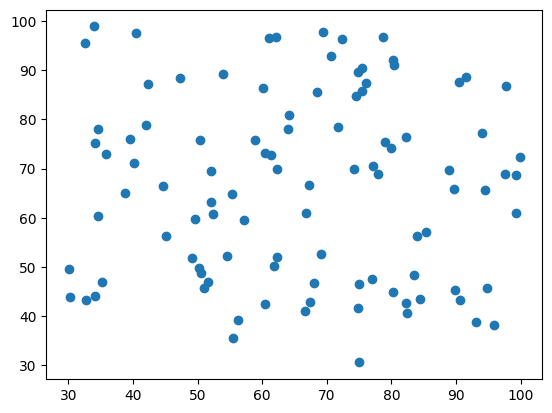

In [126]:
db = pd.read_csv('https://sharon.srworkspace.com/ml/datasets/hw4/exams.csv', header=None).to_numpy()
data, labels = db[:,:-1], db[:,-1]

plt.scatter(data[:, 0], data[:, 1])
plt.show()

We are going to divide the data into 2 clusters. <br/>
Define Kmeans object and fit the data.

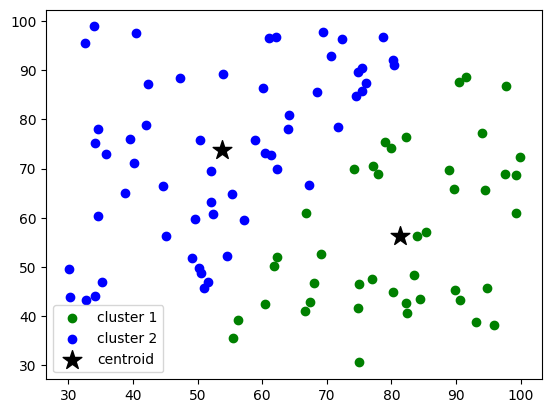

In [127]:
clust = Kmeans(n_clusters=2)
clust.fit(data)

# This code plots the clustered data with centroids
labels = clust.labels
centroids = clust.centroids

c0 = data[labels == 0]
c1 = data[labels == 1]

plt.scatter(c0[:,0], c0[:,1], c='green', label='cluster 1')
plt.scatter(c1[:,0], c1[:,1], c='blue', label='cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='black', label='centroid')
plt.legend()

plt.show()

Use the Elbow Method to choose another number of centroids between 1-10. <br/>
<font color='red'>Explain your choice</br> We can notice that starting from k = 6 the Sum of squared distance starts to decrease slowly, forming a shape of elbow. Therefore, our choise would be k = 6</font>

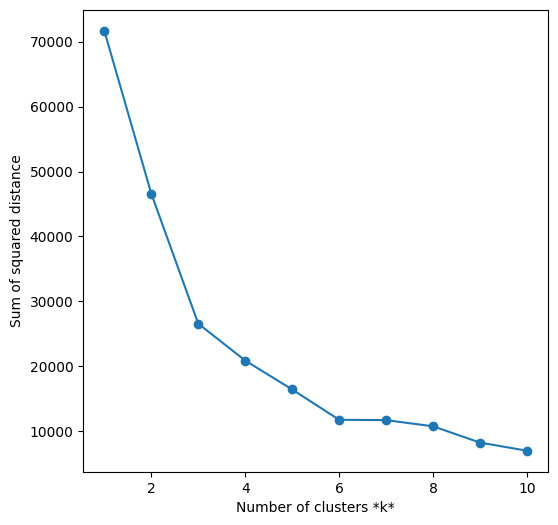

In [128]:
sse = []
list_k = list(range(1, 11))

for k in list_k:
    clust = Kmeans(n_clusters=k) #creating an instance of Kmeans, with k number of clusters
    clust.fit(data) #fitting the data to clust
    sse.append(clust.error) #appending the computed to the sse list

'''Plot sse against k'''
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')
plt.show()

Apply clustering with the selected k

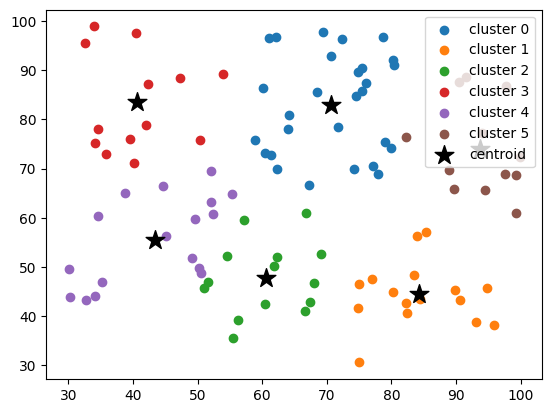

In [129]:
# Implement here
k = 6 #the selected k
clust = Kmeans(n_clusters=k) #creating an instance of Kmeans with the selected k
clust.fit(data) #fitting the data to clust

labels = clust.labels #extracting the different labels
centroids = clust.centroids #extracting the different centroids coordinates
clusters = [data[clust.labels == i] for i in range(k)] #creating a list of arrays, each for the data of one of the clusters

#plotting the data of each cluster represented by dots, and the centroids of each cluster represented by stars
for i in range(k):
  plt.scatter(clusters[i][:,0], clusters[i][:,1], label=f'cluster {i}')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='black', label='centroid')
plt.legend()
plt.show()

Now, you will compress some image using k-means. <br/>
Here, you are given image from size 400x600x3. The last parameter is the number of channels. 3 channels means that the image is colored (unlike 1 in, which is grayscale). <br/>
Our goal is to reduce the number of colors to 20 and represent (compress) the photo using those 20 colors only. <br/>

Motivation: the original image requires 400x600x3x8 bits, while the new image will require only 400x600x5 + 20x24 bits, almost 5 times smaller!<br/>
To really do this, we will take the image and treat every pixel as a data point, where each data point is in 3d space (r,g,b). Then, we cluster into 20 centroids, and we assign each pixel to a centroid. This will allow us to represent the image using only 20 colors.


In [130]:
#@title helper function

import urllib.request

def read_image(url):
    req = urllib.request.urlopen(url)
    arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
    return cv2.imdecode(arr, -1)

Complete the missing code

In [131]:
from sklearn.cluster import KMeans
import cv2

img = read_image('https://sharon.srworkspace.com/ml/datasets/hw4/image.jpg')
img_size = img.shape

# Reshape it to be 2-dimension
X = img.reshape(img_size[0] * img_size[1], img_size[2])		# Turn hxwx3 into (h*w)x3

# Run the Kmeans algorithm
km = KMeans(n_clusters=20)
km.fit(X)

'''
The km has the following properties:
(*) km.labels_ is an array size (pixels, 20), will give each pixel its class from 20 classes (values are between 0-19)
(*) km.cluster_centers_ is an array size 20x3, where the ith row represents the color value for the ith label.
	For example, cluster_centers_[0] = [r,g,b], the first center.
'''

# Use the centroids to compress the image
img_compressed =km.cluster_centers_[km.labels_] # Use cluster_centers_ and labels_
img_compressed = np.clip(img_compressed.astype('uint8'), 0, 255)

# Reshape X_recovered to have the same dimension as the original image 128 * 128 * 3'''
img_compressed = img_compressed.reshape(img_size[0], img_size[1], img_size[2])

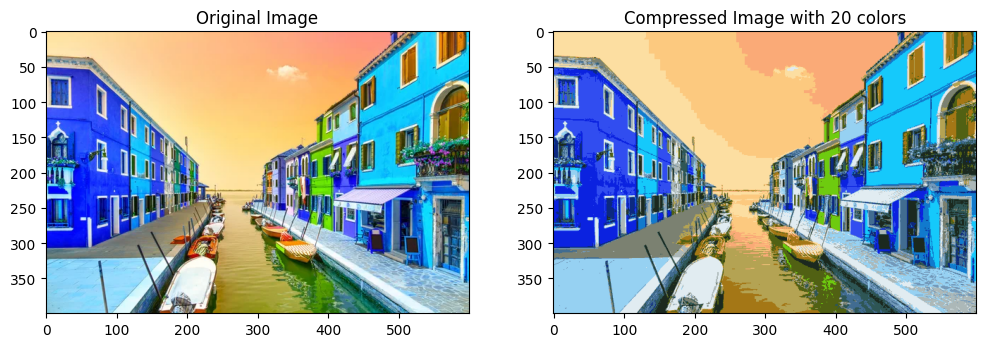

In [132]:

# Plot the original and the compressed image next to each other'''
plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(img_compressed)
plt.title(f'Compressed Image with {km.n_clusters} colors')

plt.show()

## load smiling dataset

In the third question, we will deal with the Smiling-face dataset, which determines if a person is smiling or not. You will try several models and hope to get good results<br/>
Your task is: run the following section and make sure your understand what's going on.

Go to your <a href="https://www.kaggle.com/">Kaggle</a> account and under the settings, generate new API token. <br/>
This will give you the json file, which you will upload here.

In [133]:
# The script expects you to upload JSON file to it!

! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list
! kaggle datasets download chazzer/smiling-or-not-face-data
! unzip -q smiling-or-not-face-data.zip -d data

Saving kaggle.json to kaggle.json
401 - Unauthorized - Unauthenticated
Dataset URL: https://www.kaggle.com/datasets/chazzer/smiling-or-not-face-data
License(s): CC0-1.0
 50% 9.00M/18.0M [00:00<00:00, 87.0MB/s]
100% 18.0M/18.0M [00:00<00:00, 123MB/s] 


import libraries

In [134]:
import numpy as np
from matplotlib import pyplot as plt
import os
import cv2

import warnings
warnings.filterwarnings('ignore')

process the images

In [135]:
def proccess_data(folder):
	image_arrays = []
	for filename in os.listdir(folder):
		file_path = os.path.join(folder, filename)
		image = cv2.imread(file_path)
		gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
		image_arrays.append(gray_image)
	return np.array(image_arrays)

smile = proccess_data('./data/smile')
non_smile = proccess_data('./data/non_smile')

dataset = np.vstack((smile,non_smile))
dataset = dataset / 255

labels = [0] * len(smile) + [1] * len(non_smile)
labels = np.array(labels)

display smiling and non-smiling image.

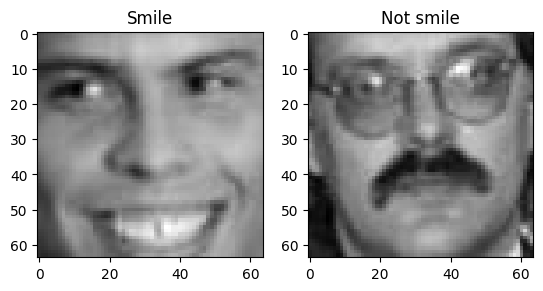

In [136]:
plt.subplot(121)
plt.title("Smile")
plt.imshow(smile[0], cmap='gray')

plt.subplot(122)
plt.title("Not smile")
plt.imshow(non_smile[0], cmap='gray')

plt.show()

print the smiling and non-smiling data + the united dataset along with labels.

In [137]:
print(f'smile array size is (images, height, width)={smile.shape}')
print(f'non smile array size is (images, height, width)={non_smile.shape}')
print()
print(f'dataset array size is {dataset.shape}')
print(f'labels array size is {labels.shape}')

smile array size is (images, height, width)=(600, 64, 64)
non smile array size is (images, height, width)=(603, 64, 64)

dataset array size is (1203, 64, 64)
labels array size is (1203,)


Prepear train and test datasets, print their structure. Since you have to deal with 1d features, we flatten the squared image

In [138]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dataset, labels, test_size = 0.2, stratify=labels, random_state=42)

print(f'train size is {x_train.shape} and labels size is {y_train.shape}')
print(f'test size is {x_test.shape} and labels size is {y_test.shape}')
print()

x_train_flatten = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
x_test_flatten = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])

print(f'flattened train size is {x_train_flatten.shape} ')
print(f'flattened test size is {x_test_flatten.shape}')

train size is (962, 64, 64) and labels size is (962,)
test size is (241, 64, 64) and labels size is (241,)

flattened train size is (962, 4096) 
flattened test size is (241, 4096)


## Question 3 - PCA, LDA

You will try to classify the smiling faces dataset using feature reduction and KNN (since there are 4096 features!). Than you will compare it to LDA

import libraries

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

Implement PCA to reduce the dimension of the images from 4096=64x64 to 81=9x9. For time effciency, DONT use any loops here.

Hint: Implement inverse_transform to recover the original vector from the compressed one. <br/>
Hint: When dealing with symmetric matrix, you can call eigh instead of eig function of numpy, its much faster.

In [ ]:
def PCA_train(data, k):
	# Implement here
	# Download data to k dimensions
	mu = np.mean(data, axis=0) #calculating the mean vector
	Z = data - mu #subtracting the mean vector from the data
	S = np.matmul(Z.transpose(), Z) #computing the scatter matrix
	eigenvalues, eigenvectors = np.linalg.eigh(S) #computing the eigenvalues and the eigenvectors
	eigenvalues_sorted_indexes = np.argsort(eigenvalues)[::-1] #extracting the indexes of the eigenvalues from the largest to the smallest
	sorted_eigenvectors = eigenvectors[:, eigenvalues_sorted_indexes] #sorting the eigenvectors according to their eigenvalues order
	top_k_eigenvectors = sorted_eigenvectors[:, :k]	#extracting the largest k eigenvectors
	Y = np.matmul(top_k_eigenvectors.transpose(), Z.transpose()) #Y = (E^t)*Z
	return Y.T, mu, top_k_eigenvectors


def PCA_test(test, mu, E):
	# Implement here
	Z = test - mu #subtracting the mean from the data
	Y = np.dot(E.transpose(), Z.transpose()) #Y = (E^t)*Z
	return Y.T

def recover_PCA(data, mu, E):
	# Implement here
	Z_recovered = np.dot(E, data.transpose()) #Z = (E)*Y
	data_recovered = Z_recovered + mu #adding the mean back to the data
	return data_recovered

Apply the PCA. <br/>
Make sure you fit the PCA model only to the training set (but apply it to both training and test sets). <br/>

In [ ]:
k = 81 #the number of dimensions to reduce to (9*9)

x_train_new, mu, eig = PCA_train(x_train_flatten, k) # Implement here
x_test_new = PCA_test(x_test_flatten, mu, eig) # Implement here

Pick another random image and show the result of applying PCA to it, and then try to recover the whole size again.

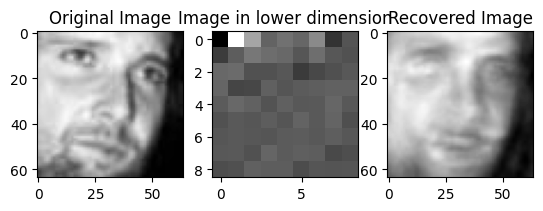

In [ ]:
import random
random_index = random.randint(0, len(x_test) - 1) #selecting a random index
original_image = x_test[random_index] #the original image from the test set
reshaped_image = x_test_new[random_index].reshape(9,9) #reshaping the PCA-transformed image to 9x9 dimensions
recovered_image = recover_PCA(x_test_new[random_index], mu, eig).reshape(64,64) #recover the image from PCA transformation and reshape to the original 64x64 dimensions

plt.subplot(131)
plt.title("Original Image")
plt.imshow(original_image, cmap='gray')


plt.subplot(132)
plt.title("Image in lower dimension")
plt.imshow(reshaped_image, cmap='gray')

plt.subplot(133)
plt.title("Recovered Image")
plt.imshow(recovered_image, cmap='gray')

plt.show()

Before training the model, use EIG_CDF, that given eigenvalues, draws a CDF of them like here:<br/><br/>

![Picture1.jpg](https://encrypted-tbn1.gstatic.com/images?q=tbn:ANd9GcS3mOZk1x4X3ap9nuMnst5W5pMgOXF8r3Tmx1QcFX9mba_lleuB)

As seen in the tutorials, we use them to see how much "energy" we preserve from the data. Use this to choose optimal dimension to reduce into, such the preserves 95% of the energy.

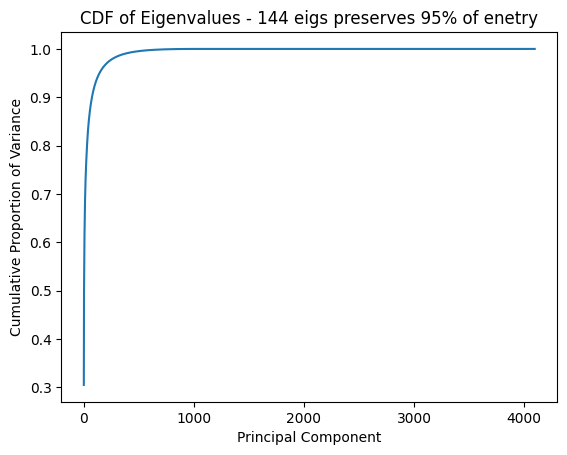

In [ ]:
def EIG_CDF(eig_list):
	sorted_eigenvalues = np.sort(eig_list)[::-1]

	eigenvalues_cumsum = np.cumsum(sorted_eigenvalues)

	eigenvalues_cumsum_normalized = eigenvalues_cumsum / eigenvalues_cumsum[-1]
	amount = np.argmax(eigenvalues_cumsum_normalized >= 0.95) + 1 # Implement here

	plt.plot(np.arange(1, len(sorted_eigenvalues)+1), eigenvalues_cumsum_normalized)
	plt.xlabel('Principal Component')
	plt.ylabel('Cumulative Proportion of Variance')
	plt.title(f'CDF of Eigenvalues - {amount} eigs preserves 95% of enetry')
	plt.show()

# Call to EIG_CDF
eigen = np.linalg.eigh(np.cov(x_train_flatten.T))[0]
EIG_CDF(eigen)

For the same image as before, show the result of applying PCA to it and recovering.<br/>
Is the result better? What is different from 81 dimensions? <br/>
<font color='red'>Write here your answer and explain it</br>
The results we received now show that the image preservation is better, and the recovered image has more details and more similar to the original one compared to before.</font>

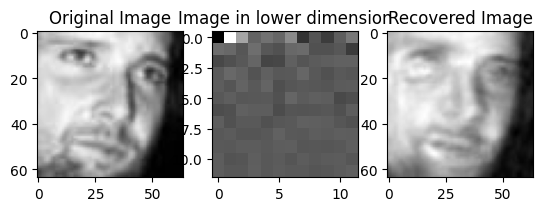

In [ ]:
optimal_k = 144  #as determined from the previous plot

x_train_opt, mu_opt, eig_opt = PCA_train(x_train_flatten, optimal_k) #applying PCA to the training data with the optimal k dimensions
x_test_opt = PCA_test(x_test_flatten, mu_opt, eig_opt) #applying the PCA transformation to the test data using the mean and eigenvectors from the training data

reshaped_image_opt = x_test_opt[random_index].reshape(12,12) #reshaping the PCA-transformed test image at the random index to 12x12 dimensions
recovered_image_opt = recover_PCA(x_test_opt[random_index], mu_opt, eig_opt).reshape(64,64) #recovering the PCA-transformed test image and reshape to original 64x64 dimensions

plt.subplot(131)
plt.title("Original Image")
plt.imshow(original_image, cmap='gray')

plt.subplot(132)
plt.title("Image in lower dimension")
plt.imshow(reshaped_image_opt, cmap='gray')

plt.subplot(133)
plt.title("Recovered Image")
plt.imshow(recovered_image_opt, cmap='gray')

plt.show()

Now, you are ready to train the model. Use KNN, tune the best k using cross_val_score (with sklearn)

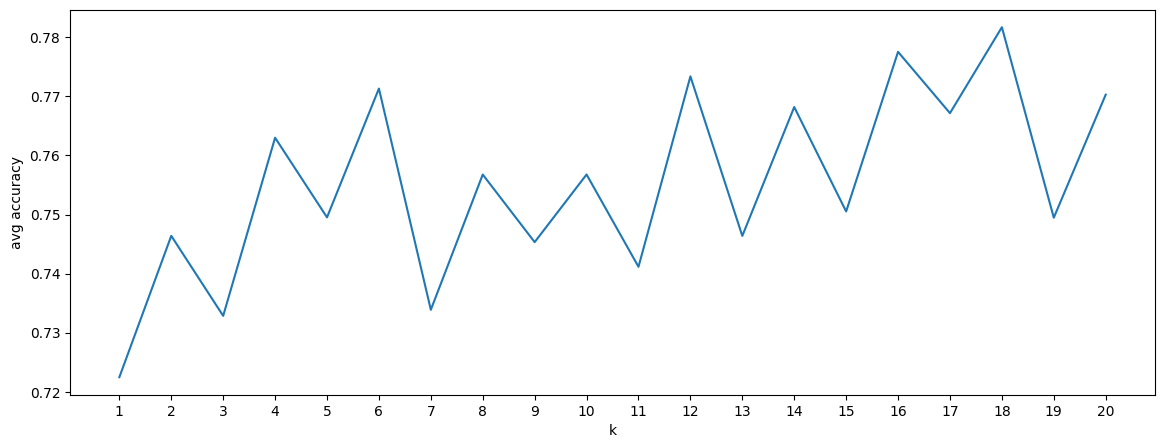

In [ ]:
# Implement here
# Train KNN and tune the best k using cross_val_score
ks = range(1, 21)  # Testing k from 1 to 20
accs = []

for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k) #creating a KNN classifier with k neighbors
    scores = cross_val_score(knn, x_train_opt, y_train, cv=5) #performing 5 fold cross-validation on the training data
    accs.append(scores.mean())

plt.figure(figsize=(14,5))
plt.plot(ks, accs)
plt.xlabel('k')
plt.xticks(ks)
plt.ylabel('avg accuracy')
plt.show()

Print the accuracy of your model on the test set.

In [ ]:
# Implement here
best_k = ks[np.argmax(accs)] #selecting the best k based on the accuracy
print(f'The best k is {best_k} with an average accuracy of {max(accs):.2f}')

#training the final model with the best k and evaluate on test set
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(x_train_opt, y_train)
acc = knn_best.score(x_test_opt, y_test)
print(f'acc on test is {acc}')

The best k is 18 with an average accuracy of 0.78
acc on test is 0.7468879668049793


Answer the following sum-up questions: <br/>
- What pre-proccessing actions were done on the data?
- Should we apply Standard Scaler? Why?
- Suggest one idea for improvement (rather than LDA)

<font color='red'>Write here your answers, with explainations </br>- The pre-processing actions done are the normalization/centering by subtracting the mean of each feature from the data, and the PCA transofrmation which projected the data into a lower-dimensional space.</br> - While it's important to scale the data before applying PCA, since it ensures that all the variables have the same weight, In this specific case the answer is no, because the pixel values in images are typically on a similar scale (between 0 and 255), in addition, the scaling may make recovering the photo harder. </br> - I suggest using alternative distance metric like manhattan distance, since some pixel differences might be more meaningful than others for the classification.</font>


For the second part, we will use LDA on the data <b>before</b> PCA. <br/>
Use the model of LinearDiscriminantAnalysis from Sklearn, train the data and print the accuracy test using KNN. <br/>
Use the best k you found earlier.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#applying lda
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(x_train_flatten, y_train)
X_test_lda = lda.transform(x_test_flatten)

#training KNN model with the lda-transformed data
knn_lda = KNeighborsClassifier(n_neighbors=best_k)
knn_lda.fit(X_train_lda, y_train)

#predicting the test set
y_test_pred_lda = knn_lda.predict(X_test_lda)

#calculating accuracy for lda
final_accuracy_lda = np.mean(y_test == y_test_pred_lda)
print(f'Accuracy on test set after LDA is {final_accuracy_lda:.2f}')

#implementing lda after pca
X_train_pca_lda = lda.fit_transform(x_train_opt, y_train)
X_test_pca_lda = lda.transform(x_test_opt)

#training the KNN model with the pca+lda-transformed data
knn_pca_lda = KNeighborsClassifier(n_neighbors=best_k)
knn_pca_lda.fit(X_train_pca_lda, y_train)

y_test_pred_pca_lda = knn_pca_lda.predict(X_test_pca_lda) #predicting the test set

final_accuracy_pca_lda = np.mean(y_test == y_test_pred_pca_lda) #calculating accuracy for lda+pca
print(f'Accuracy on test set after PCA and LDA is {final_accuracy_pca_lda:.2f}')

Accuracy with LDA on original data: 0.8215767634854771
Accuracy with LDA on PCA-transformed data: 0.8713692946058091


Now, repeat the same as above, but using the data <b>after</b> PCA and using the same k.
- Was the combination of PCA and LDA helpful more than LDA alone?
- Comparing LDA alone vs PCA alone (as dimensionality reduction), which one was better to this problem? Justify.

<font color='red'>Write your answers here and explain them. </br> - the combination of PCA and LDA yielded a more accurate results than LDA alone (0.87 accuracy compared to 0.82) which means that it's more helpful. </br> - LDA alone achieved higher accuracy compared to PCA alone (0.82 to about 0.75), which can be explained by the idea that LDA cosider the class labels, and aims that the seperation between classes to be maximized.</font>

## Question 4 - Adaboost
See attached pdf in moodle assignment!



## Question 5 - Kernel PCA - 10 pts bonus
See attached pdf in moodle assignment! <br/>
Here you will implement the parts that are relevant for that question

In [ ]:
# Implement here everything you need
from sklearn.decomposition import KernelPCA

#Applying kernel PCA for the data
kpca = KernelPCA(kernel='cosine')
x_train_fitted = kpca.fit_transform(x_train_flatten)
x_test_fitted = kpca.transform(x_test_flatten)

#classifying with KNN using 125 neighbors
knn = KNeighborsClassifier(n_neighbors=125)
knn.fit(x_train_fitted, y_train)
y_pred = knn.predict(x_test_fitted)

#computing and printing the accuracy achieved
accuracy = np.mean(y_pred == y_test)
print(accuracy)




0.8049792531120332
